In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import os

folder_path = r'D:\WORK\FLOODNET\SensorData'
flood_files = [f for f in os.listdir( folder_path) if f.endswith('.csv')]

flood_data = pd.DataFrame()
for flood_file in flood_files:
    temp = pd.read_csv(os.path.join( folder_path , flood_file))
    flood_data = pd.concat([flood_data, temp], axis=0)

flood_data.head()

,time,deployment_id,dev_id,depth_raw_mm,depth_filt_mm,depth_proc_mm,batt_v,f_cnt,dist_mm,lat,lon,date_deployed,deploy_type,sensor_display_name,sensor_address_street,sensor_address_borough,sensor_address_neighborhood,nearest_weather_station,nearest_tidal_id,mounted_over,sensor_mount
0,2022-10-01 00:00:08.314000+00:00,easily_cosmic_slug,fs-00010,0.0,0.0,0.0,4.092,70504.0,2356.0,40.809830,-73.948100,"December 12, 2021",pluvial,M - 126th St/7th Av,W 126th and Adam Clayton Powell Jr Blvd,Manhattan,Harlem,nyc-micronet-mhchel,NaN,Sidewalk,Streetsign Post
1,2022-10-01 00:00:18.040000+00:00,handsome_violet_leech,fs-00025,0.0,0.0,0.0,4.074,4619.0,2798.0,40.695371,-73.794115,"June 10, 2022",pluvial,Q - 108th Ave/159th St,108 Ave and 159 St,Queens,South Jamaica,nyc-micronet-qnsozo,NaN,Sidewalk,Streetsign Post
2,2022-10-01 00:00:19.736000+00:00,daily_happy_satyr,fs-00022,-130.0,0.0,0.0,4.126,243336.0,1632.0,40.591360,-73.809960,"December 10, 2021",pluvial,Q - Beach 84 St,Beach 84 St,Queens,Far Rockaway,nyc-micronet-qnsozo,usgs-tidal-01311850,Sidewalk,Fence
3,2022-10-01 00:00:27.073000+00:00,duly_star_bee,fs-00001,2.0,0.0,0.0,4.060,70639.0,2501.0,40.811159,-73.954033,"December 12, 2021",pluvial,M - Morningside Av/125th St,Morningside & 125th,Manhattan,Harlem,nyc-micronet-mhchel,NaN,Sidewalk,Streetsign Post
4,2022-10-01 00:00:35.790000+00:00,future_aqua_wildcat,fs-00032,1.0,0.0,0.0,4.116,93419.0,2280.0,40.619373,-74.147436,"July 22, 2022",pluvial,SI - Lyon Pl/Devens St,Lyon Pl and Devens St,Staten Island,Graniteville,NaN,NaN,Sidewalk,Streetsign Post


In [219]:
flood_data = flood_data.drop(['dev_id','batt_v','f_cnt','dist_mm','deploy_type','sensor_address_street','sensor_address_borough','nearest_weather_station','nearest_tidal_id','mounted_over','sensor_mount'], axis=1 )
flood_data.head()

,time,deployment_id,depth_raw_mm,depth_filt_mm,depth_proc_mm,lat,lon,date_deployed,sensor_display_name,sensor_address_neighborhood
0,2022-10-01 00:00:08.314000+00:00,easily_cosmic_slug,0.0,0.0,0.0,40.809830,-73.948100,"December 12, 2021",M - 126th St/7th Av,Harlem
1,2022-10-01 00:00:18.040000+00:00,handsome_violet_leech,0.0,0.0,0.0,40.695371,-73.794115,"June 10, 2022",Q - 108th Ave/159th St,South Jamaica
2,2022-10-01 00:00:19.736000+00:00,daily_happy_satyr,-130.0,0.0,0.0,40.591360,-73.809960,"December 10, 2021",Q - Beach 84 St,Far Rockaway
3,2022-10-01 00:00:27.073000+00:00,duly_star_bee,2.0,0.0,0.0,40.811159,-73.954033,"December 12, 2021",M - Morningside Av/125th St,Harlem
4,2022-10-01 00:00:35.790000+00:00,future_aqua_wildcat,1.0,0.0,0.0,40.619373,-74.147436,"July 22, 2022",SI - Lyon Pl/Devens St,Graniteville


In [220]:
flood_data['time'] = pd.to_datetime( flood_data['time'] )
flood_data.head()

,time,deployment_id,depth_raw_mm,depth_filt_mm,depth_proc_mm,lat,lon,date_deployed,sensor_display_name,sensor_address_neighborhood
0,2022-10-01 00:00:08.314000+00:00,easily_cosmic_slug,0.0,0.0,0.0,40.809830,-73.948100,"December 12, 2021",M - 126th St/7th Av,Harlem
1,2022-10-01 00:00:18.040000+00:00,handsome_violet_leech,0.0,0.0,0.0,40.695371,-73.794115,"June 10, 2022",Q - 108th Ave/159th St,South Jamaica
2,2022-10-01 00:00:19.736000+00:00,daily_happy_satyr,-130.0,0.0,0.0,40.591360,-73.809960,"December 10, 2021",Q - Beach 84 St,Far Rockaway
3,2022-10-01 00:00:27.073000+00:00,duly_star_bee,2.0,0.0,0.0,40.811159,-73.954033,"December 12, 2021",M - Morningside Av/125th St,Harlem
4,2022-10-01 00:00:35.790000+00:00,future_aqua_wildcat,1.0,0.0,0.0,40.619373,-74.147436,"July 22, 2022",SI - Lyon Pl/Devens St,Graniteville


In [221]:
pd.set_option('display.max_columns', None)
all_sensors = r"D:\WORK\FLOODNET\Sensor Locations Directory (1).xlsx"
all_sensors = pd.read_excel(all_sensors, sheet_name='street sensors (live)')
all_sensors = all_sensors.drop(['nearest_weather_station','nearest_tidal_id','mounted_over','sensor_mount','date_deployed','date_down'], axis =1 )
all_sensors = all_sensors.drop(['height_ground_mm','B/e tag','deployed_by','Last Visit','Visit Notes','Plan notes','height_navd88_m','Last time FK received a message as of 6/16/2022','deploy_type','sensor_status','fk_status','Unnamed: 20','csv sent to FieldKit'], axis=1)
all_sensors = all_sensors[ all_sensors['deployment_id']!='-' ].copy()
print(all_sensors.shape[0])
all_sensors.head()

35


,sensor_display_name,sensor_address_borough,sensor_address_neighborhood,lat,lon,deployment_id,sensor_address_street
1,BK - 4th Av/Garfield Pl,Brooklyn,Gowanus,40.675855,-73.983944,daily_gentle_beetle,Carroll & Garfield
2,BK - 9th St/Smith St (RETIRED),Brooklyn,Gowanus,40.673654,-73.995396,widely_proud_lizard,Smith & 9th
3,BK - 9th St/Smith St,Brooklyn,Gowanus,40.673401,-73.994892,overly_heroic_squid,Smith & 9th
4,BK - Carroll St/4th Av,Brooklyn,Gowanus,40.676281,-73.984089,weekly_poetic_guinea,Carroll & 4th
5,BK - Columbia St/Bay St,Brooklyn,Red Hook,40.673267,-74.008418,vastly_saving_whale,Bay & Columbia


In [222]:
path = r"C:\Git_Repo\FloodAnalysis\DATA\NYCDTA_flood_reports_detections_join.geojson"
import geopandas as gpd

cdta = gpd.read_file(path)

geo_sensors = gpd.GeoDataFrame( all_sensors, geometry=gpd.points_from_xy(all_sensors.lon, all_sensors.lat), crs='EPSG:4326' )
geo_sensors = geo_sensors[ ~geo_sensors['sensor_display_name'].str.contains('RET') ]
geo_sensors = geo_sensors.to_crs('EPSG:2263')

geo_sensors = geo_sensors.sjoin(cdta, how='inner')
geo_sensors.head(3)

,sensor_display_name,sensor_address_borough,sensor_address_neighborhood,lat,lon,deployment_id,sensor_address_street,geometry,index_right,BoroCode,BoroName,CountyFIPS,CDTA2020,CDTAName,CDTAType,Shape_Leng,Shape_Area,max_depth_max,max_depth_range,max_depth_sum,wet_day_co_max,wet_day_co_sum,globalid_count,recent_floods_count,reports_tot,Floodnet_FG_count,selected_cdta,label
1,BK - 4th Av/Garfield Pl,Brooklyn,Gowanus,40.675855,-73.983944,daily_gentle_beetle,Carroll & Garfield,POINT (988703.714 185508.939),5,3,Brooklyn,047,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,0,77350.580928,8.664108e+07,62.6,62.1,360.8,28.0,81.0,1,1.0,82,7.0,0,Red Hook + Park Slope + Carroll Gardens
3,BK - 9th St/Smith St,Brooklyn,Gowanus,40.673401,-73.994892,overly_heroic_squid,Smith & 9th,POINT (985666.916 184614.590),5,3,Brooklyn,047,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,0,77350.580928,8.664108e+07,62.6,62.1,360.8,28.0,81.0,1,1.0,82,7.0,0,Red Hook + Park Slope + Carroll Gardens
4,BK - Carroll St/4th Av,Brooklyn,Gowanus,40.676281,-73.984089,weekly_poetic_guinea,Carroll & 4th,POINT (988663.509 185664.066),5,3,Brooklyn,047,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,0,77350.580928,8.664108e+07,62.6,62.1,360.8,28.0,81.0,1,1.0,82,7.0,0,Red Hook + Park Slope + Carroll Gardens


In [224]:
all_data = flood_data.join(geo_sensors.drop(['lat', 'lon', 'sensor_display_name', 'sensor_address_neighborhood'],axis=1).set_index('deployment_id'), on='deployment_id')
all_data.head()

,time,deployment_id,depth_raw_mm,depth_filt_mm,depth_proc_mm,lat,lon,date_deployed,sensor_display_name,sensor_address_neighborhood,sensor_address_borough,sensor_address_street,geometry,index_right,BoroCode,BoroName,CountyFIPS,CDTA2020,CDTAName,CDTAType,Shape_Leng,Shape_Area,max_depth_max,max_depth_range,max_depth_sum,wet_day_co_max,wet_day_co_sum,globalid_count,recent_floods_count,reports_tot,Floodnet_FG_count,selected_cdta,label
0,2022-10-01 00:00:08.314000+00:00,easily_cosmic_slug,0.0,0.0,0.0,40.809830,-73.948100,"December 12, 2021",M - 126th St/7th Av,Harlem,Manhattan,W 126th and Adam Clayton Powell Jr Blvd,POINT (998617.035 234324.175),44.0,1.0,Manhattan,061,MN10,MN10 Harlem (CD 10 Equivalent),0,36182.356100,3.823185e+07,0.8,0.0,0.8,NaN,0.0,0.0,NaN,0.0,NaN,0.0,Harlem
1,2022-10-01 00:00:18.040000+00:00,handsome_violet_leech,0.0,0.0,0.0,40.695371,-73.794115,"June 10, 2022",Q - 108th Ave/159th St,South Jamaica,Queens,108 Ave and 159 St,POINT (1041341.910 192686.063),59.0,4.0,Queens,081,QN12,QN12 Jamaica-St. Albans-Hollis (CD 12 Approxim...,0,70947.035843,2.658524e+08,57.2,56.6,130.3,48.0,65.0,0.0,NaN,65.0,1.0,0.0,Jamaica + St. Albans + Hollis
2,2022-10-01 00:00:19.736000+00:00,daily_happy_satyr,-130.0,0.0,0.0,40.591360,-73.809960,"December 10, 2021",Q - Beach 84 St,Far Rockaway,Queens,Beach 84 St,POINT (1037030.276 154782.061),61.0,4.0,Queens,081,QN14,QN14 The Rockaways (CD 14 Approximation),0,218697.792272,1.891377e+08,38.2,14.6,61.8,55.0,56.0,256.0,256.0,312.0,1.0,0.0,The Rockaways
3,2022-10-01 00:00:27.073000+00:00,duly_star_bee,2.0,0.0,0.0,40.811159,-73.954033,"December 12, 2021",M - Morningside Av/125th St,Harlem,Manhattan,Morningside & 125th,POINT (996974.505 234807.582),43.0,1.0,Manhattan,061,MN09,MN09 Morningside Heights-Hamilton Heights (CD ...,0,34907.187358,4.264195e+07,61.9,0.0,61.9,8.0,8.0,0.0,NaN,8.0,NaN,0.0,Morningside Heights + Hamilton Heights
4,2022-10-01 00:00:35.790000+00:00,future_aqua_wildcat,1.0,0.0,0.0,40.619373,-74.147436,"July 22, 2022",SI - Lyon Pl/Devens St,Graniteville,Staten Island,Lyon Pl and Devens St,POINT (943319.404 164965.218),67.0,5.0,Staten Island,085,SI01,SI01 North Shore (CD 1 Equivalent),0,153717.286401,3.772842e+08,51.6,49.8,53.4,50.0,50.0,0.0,NaN,50.0,1.0,0.0,North Shore


In [225]:
import numpy as np

filtered_data = pd.DataFrame()
for i,gr in all_data.groupby('deployment_id'):
    gr['smooth_depth_mm'] = gr['depth_proc_mm'].rolling(10,center=True).mean() 

    # if less then 4 consectuve values are more than 0, assign 0
    roll_window = 60
    gr['smooth_depth_mm'] = np.where( gr['smooth_depth_mm'].rolling(roll_window,center=True).sum() < roll_window, 0, gr['smooth_depth_mm'] )
    filtered_data = pd.concat( [filtered_data, gr] )

# # # Convert mm to inches
filtered_data['smooth_depth_in'] = filtered_data['smooth_depth_mm'] / 25.4


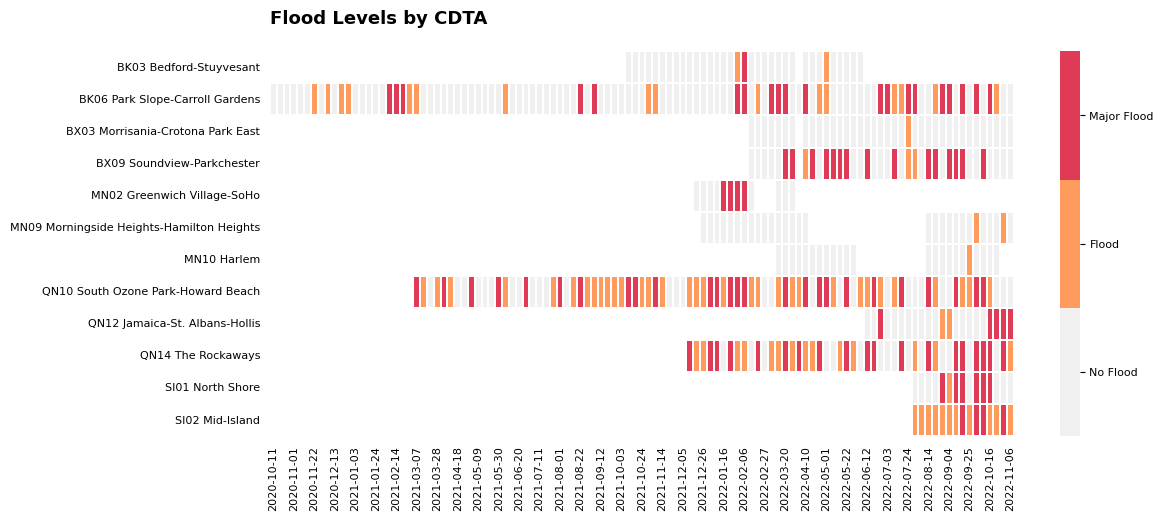

In [99]:
# Make matplotlib plot exported to ai 42 editable
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# ---- FORMAT & PLOT ----
# filtered_data = filtered_data[ filtered_data['time'].dt.year > 2021 ]

filtered_data['smooth_depth_cut'] = pd.cut(
    filtered_data['smooth_depth_in'],
    bins=[-1, 0.25, 4, 200],
    labels=[ 0, 1, 2]
)

# filtered_data

pt = pd.pivot_table(
    data = filtered_data.sort_values('CDTAName'),
    columns = pd.Grouper(key='time', freq='1W'),
    index = 'CDTAName',
    values='smooth_depth_cut',
    aggfunc='max'
)

pt.columns = pt.columns.strftime('%Y-%m-%d')
pt.index = [x.split(" (")[0] for x in pt.index]

def make_Ramp( ramp_colors ): 
    from colour import Color
    # from matplotlib.colors import LinearSegmentedColormap
    from matplotlib.colors import ListedColormap, LinearSegmentedColormap

    color_ramp = ListedColormap( ramp_colors )
    return color_ramp

custom_ramp = make_Ramp( ['#F0F0F0',"#FE9B5D","#DF3B57"] ) 

import seaborn as sns
plt.figure( figsize=(12, 5) )

ax = sns.heatmap(
    pt.astype(float),
    linewidths=0.025,
    linecolor='white',
    square=False,
    cmap = custom_ramp,
    mask=pt.isnull(),
)

ax.set_facecolor('#FFFFFF')
ax.tick_params( axis='both', left=False, bottom=False, labelsize=8 )

values = ['No Flood', 'Flood', 'Major Flood']
n = len(values)

colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels( values )
colorbar.ax.tick_params(labelsize=8)                                        

plt.xlabel('')
plt.ylabel('')
plt.savefig( r'D:\WORK\FLOODNET\VISUALS\CDTA_heatmap.pdf', dpi=300, bbox_inches='tight')
plt.title( "Flood Levels by CDTA", fontsize=13, fontweight='bold', ha = 'left', x=0, y=1.05)
plt.show();

In [100]:
RH_data = filtered_data.dropna(subset=['CDTAName'],axis=0)
RH_data = RH_data[ RH_data['CDTAName'].str.contains("BK06") ]
RH_data.head()

,time,deployment_id,depth_filt_mm,depth_proc_mm,sensor_display_name,sensor_address_borough,sensor_address_neighborhood,lat,lon,sensor_address_street,geometry,index_right,BoroCode,BoroName,CountyFIPS,CDTA2020,CDTAName,CDTAType,Shape_Leng,Shape_Area,max_depth_max,max_depth_range,max_depth_sum,wet_day_co_max,wet_day_co_sum,globalid_count,recent_floods_count,reports_tot,Floodnet_FG_count,selected_cdta,label,smooth_depth_mm,smooth_depth_in,smooth_depth_cut
3,2021-11-01 00:00:43.746965+00:00,daily_gentle_beetle,0.0,0.0,BK - 4th Av/Garfield Pl,Brooklyn,Gowanus,40.675855,-73.983944,Carroll & Garfield,POINT (988703.714 185508.939),5.0,3.0,Brooklyn,047,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,0,77350.580928,8.664108e+07,62.6,62.1,360.8,28.0,81.0,1.0,1.0,82.0,7.0,0.0,Red Hook + Park Slope + Carroll Gardens,NaN,NaN,NaN
6,2021-11-01 00:01:46.948181+00:00,daily_gentle_beetle,0.0,0.0,BK - 4th Av/Garfield Pl,Brooklyn,Gowanus,40.675855,-73.983944,Carroll & Garfield,POINT (988703.714 185508.939),5.0,3.0,Brooklyn,047,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,0,77350.580928,8.664108e+07,62.6,62.1,360.8,28.0,81.0,1.0,1.0,82.0,7.0,0.0,Red Hook + Park Slope + Carroll Gardens,NaN,NaN,NaN
12,2021-11-01 00:02:50.726799+00:00,daily_gentle_beetle,0.0,0.0,BK - 4th Av/Garfield Pl,Brooklyn,Gowanus,40.675855,-73.983944,Carroll & Garfield,POINT (988703.714 185508.939),5.0,3.0,Brooklyn,047,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,0,77350.580928,8.664108e+07,62.6,62.1,360.8,28.0,81.0,1.0,1.0,82.0,7.0,0.0,Red Hook + Park Slope + Carroll Gardens,NaN,NaN,NaN
15,2021-11-01 00:03:53.305096+00:00,daily_gentle_beetle,0.0,0.0,BK - 4th Av/Garfield Pl,Brooklyn,Gowanus,40.675855,-73.983944,Carroll & Garfield,POINT (988703.714 185508.939),5.0,3.0,Brooklyn,047,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,0,77350.580928,8.664108e+07,62.6,62.1,360.8,28.0,81.0,1.0,1.0,82.0,7.0,0.0,Red Hook + Park Slope + Carroll Gardens,NaN,NaN,NaN
21,2021-11-01 00:04:56.372178+00:00,daily_gentle_beetle,0.0,0.0,BK - 4th Av/Garfield Pl,Brooklyn,Gowanus,40.675855,-73.983944,Carroll & Garfield,POINT (988703.714 185508.939),5.0,3.0,Brooklyn,047,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,0,77350.580928,8.664108e+07,62.6,62.1,360.8,28.0,81.0,1.0,1.0,82.0,7.0,0.0,Red Hook + Park Slope + Carroll Gardens,NaN,NaN,NaN


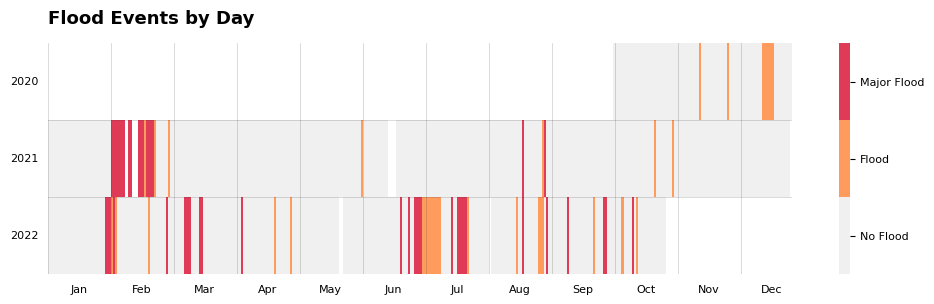

In [135]:
RH_data['year'] = RH_data['time'].dt.year

# Get week number
RH_data['week'] = RH_data['time'].dt.dayofyear

rh_daily =pd.pivot_table(
    data = RH_data,
    columns = 'week',
    index = 'year',
    values= 'smooth_depth_cut',
    aggfunc='max'
).astype( float )

plt.figure( figsize=(12,3) )
ax = sns.heatmap( rh_daily, cmap= custom_ramp, lw=0.0025 )
ax.tick_params( axis='both', left=False, bottom=False, labelsize=8 )

values = ['No Flood', 'Flood', 'Major Flood']
n = len(values)

colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels( values )
colorbar.ax.tick_params(labelsize=8)    

# Custom x lables
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# months = ['Jan','Feb','Mar']
plt.xticks( [(i*31)+15 for i in range(len(months))] , labels= months , rotation = 0, fontsize=8, ha='center')

# Ad grids
[ plt.axvline(i*31, color = '#333', alpha=0.25 , lw=0.5 ) for i in range(len(months))]
[ plt.axhline(i, color = '#333', alpha=0.25 , lw=0.5 ) for i in range(1,3) ]

# Rotate y labels
plt.ylabel('')
plt.xlabel('')
plt.yticks(rotation=0)
plt.title( "Flood Events by Day", fontsize=13, fontweight='bold', ha = 'left', x=0, y=1.05)
plt.savefig( r'D:\WORK\FLOODNET\VISUALS\RH_heatmap.pdf', dpi=300, bbox_inches='tight')

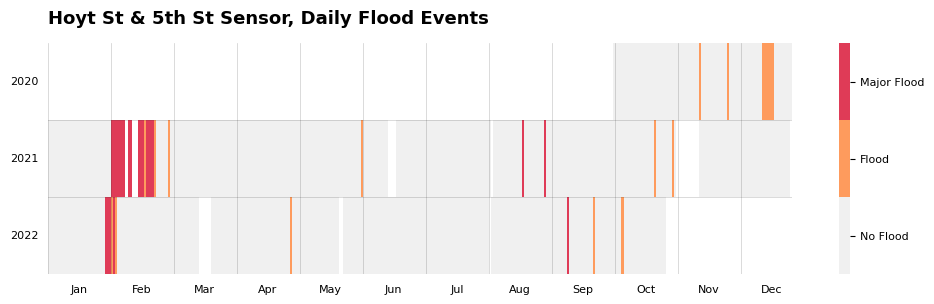

In [134]:

rh_daily =pd.pivot_table(
    data = RH_data[RH_data['sensor_display_name'].str.contains("Hoyt") ],
    columns = 'week',
    index = 'year',
    values= 'smooth_depth_cut',
    aggfunc='max'
).astype( float )

plt.figure( figsize=(12, 3) )
ax = sns.heatmap( rh_daily, cmap= custom_ramp )
ax.tick_params( axis='both', left=False, bottom=False, labelsize=8 )

values = ['No Flood', 'Flood', 'Major Flood']
n = len(values)

colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels( values )
colorbar.ax.tick_params(labelsize=8)  

# Custom x lables
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# months = ['Jan','Feb','Mar']
plt.xticks( [(i*31)+15 for i in range(len(months))] , labels= months , rotation = 0, fontsize=8, ha='center')

# Ad grids
[ plt.axvline(i*31, color = '#333', alpha=0.25 , lw=0.5 ) for i in range(len(months))]
[ plt.axhline(i, color = '#333', alpha=0.25 , lw=0.5 ) for i in range(1,3) ]

plt.ylabel('')
plt.xlabel('')
plt.yticks(rotation=0)
plt.title( "Hoyt St & 5th St Sensor, Daily Flood Events", fontsize=13, fontweight='bold', ha = 'left', x=0, y=1.05) 
plt.savefig( r'D:\WORK\FLOODNET\VISUALS\Hoyt5.pdf', dpi=300, bbox_inches='tight')

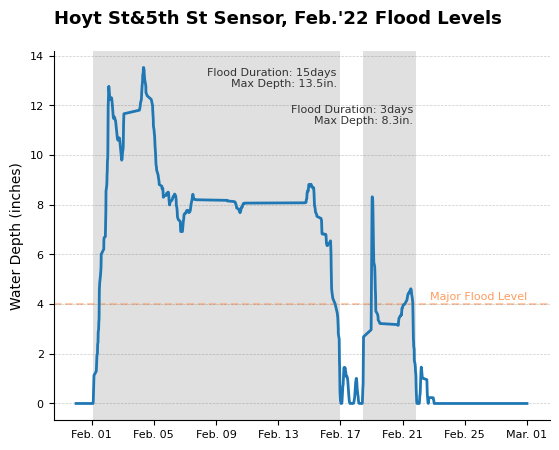

In [217]:

hoyt_data = RH_data[
    (RH_data['deployment_id'] == 'daily_new_falcon') &
    (RH_data['time'].dt.year.isin([2021])) & 
    (RH_data['week'] > 30) &  (RH_data['week'] < 60) 
    ].copy()

# rolling avg
hoyt_data['smooth_depth_in_2'] = hoyt_data['smooth_depth_in'].rolling( window=30, center=True ).mean()

sns.lineplot(
    data = hoyt_data,
    x = 'time',
    y = 'smooth_depth_in_2',
    lw = 2,
    zorder = 2
)
plt.axhline( 4, color ='#FE9B5D', alpha=0.5 , lw=1.5, ls ='--' , zorder = 1)

# Annotate over the axhline
plt.annotate( "Major Flood Level", xy = (hoyt_data['time'].max(),4.1), ha='right', va = 'bottom' , color = '#FE9B5D', fontsize=8 )

# hide every 2nd xtick
plt.xticks( fontsize=8 )
plt.yticks( fontsize=8 )

import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b. %d'))

# Grey overlays for non 0 values
def group_consecutive(data):
    import numpy as np
    return np.split(data, np.where(np.diff(data) != 1)[0]+1)

hoyt_data['order'] = [i for i in range(len(hoyt_data))]

non_zero = hoyt_data[ hoyt_data['smooth_depth_in_2'] > 0.25 ]

for count,nz in enumerate(group_consecutive(non_zero['order'].values)):
    if len(nz) > 300:
        nz_time_min = hoyt_data['time'].iloc[nz[0]]
        nz_time_max = hoyt_data['time'].iloc[nz[-1]]
        # filter data by dates
        nz_data = hoyt_data[ (hoyt_data['time'] >= nz_time_min) & (hoyt_data['time'] <= nz_time_max) ]
        f_max = nz_data['smooth_depth_in_2'].max()     
        plt.axvspan( nz_time_min, nz_time_max, fc='#333', ec=None, alpha=0.15, zorder=0 )
        plt.annotate( 
            "Flood Duration: {}days \nMax Depth: {}in. ".format( (pd.to_datetime(nz_time_max) - pd.to_datetime(nz_time_min)).days, round(f_max,1) ) ,
            xy = ( 
                nz_time_max , 
                hoyt_data['smooth_depth_in_2'].max() - (count*0.5)
                ), ha='right', va = 'top' , color = '#333', fontsize=8 )
        
plt.grid( axis='y', alpha=0.25 , zorder=-1 , lw=0.5, ls='--', color='#333')
plt.title( "Hoyt St&5th St Sensor, Feb.'22 Flood Levels" , fontsize=13, fontweight='bold', ha = 'left', x=0, y=1.05)
plt.ylabel( "Water Depth (inches)" )
plt.xlabel( "" )
sns.despine()
plt.savefig( r'D:\WORK\FLOODNET\VISUALS\Hoyt5_timeseries.pdf', dpi=300, bbox_inches='tight')



(January 28th-29th Blizzard)[https://storymaps.arcgis.com/stories/3cc5880df4464dfb860bf89476ba6eeb]  
February 19th Snow Squall Event...snow | wind   
December 23rd Strong Low Pressure/Coastal Flooding/Arctic Outbreak Event


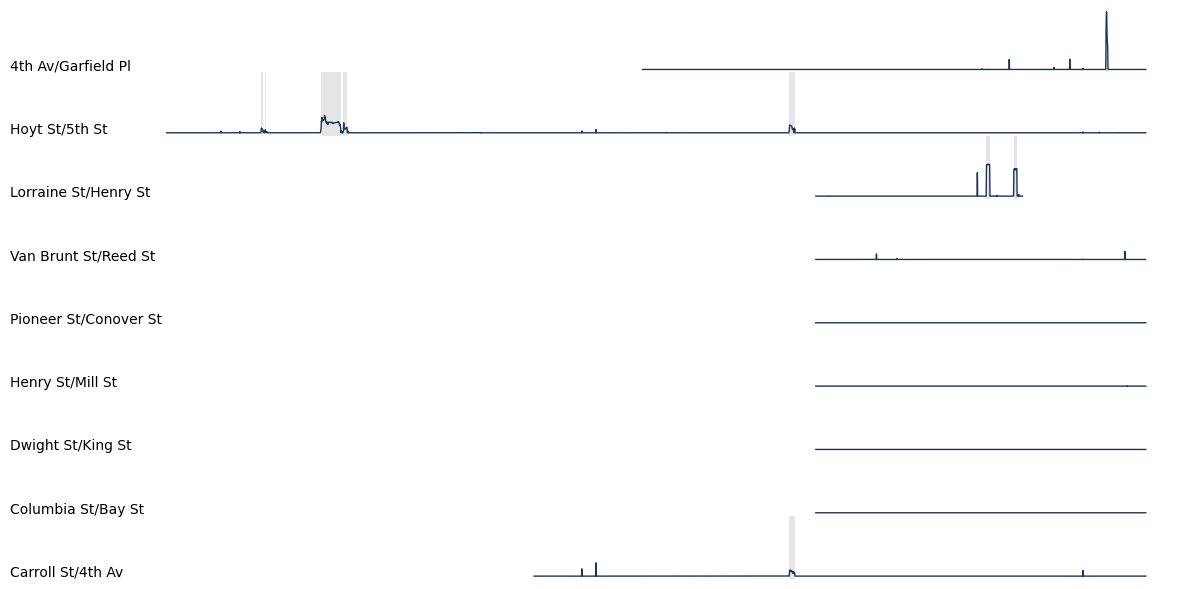

In [72]:
import seaborn as sns

# definition to group consecutive values in a list for order variable
def group_consecutive(data):
    import numpy as np
    return np.split(data, np.where(np.diff(data) != 1)[0]+1)

time_data = RH_data.groupby( ['deployment_id',pd.Grouper(key='time',freq="2H")] ).agg({
    'smooth_depth_in':'mean',
    'sensor_display_name':'first',
    }).reset_index()

time_data = time_data[ time_data['deployment_id'] != 'overly_heroic_squid' ]

time_data['smooth_depth_in'] = time_data.groupby('deployment_id').apply( lambda x: x['smooth_depth_in'].rolling(2, axis=0 ).mean() ).values
time_data = time_data.dropna( axis = 0 )
# time_data = time_data[ (time_data['time'].dt.year >= 2022) & (time_data['time'].dt.month >= 3) ]

fig,axs = plt.subplots(nrows=time_data['deployment_id'].nunique(),figsize=(12,6), sharex=True, sharey=True )

for count,id in enumerate(time_data['deployment_id'].unique()):
    ax = axs[count]
    temp = time_data[time_data['deployment_id']==id].copy()

    ax.plot(
        temp['time'], 
        temp['smooth_depth_in'], 
        lw=1 , zorder=count+1,
        color = '#1d3557')

    ax.set_ylabel( temp['sensor_display_name'].values[0].split(" - ")[1] , rotation=0, ha='left')
    # move the y label to the left
    ax.yaxis.set_label_coords(-0.1,0)
    sns.despine( bottom = True, left = True, right=True, ax=ax )
    ax.patch.set_alpha(0)

    #remove xticks
    ax.set_xticks([])
    ax.set_yticks([])

    temp['order'] = [i for i in range(temp.shape[0])]
    temp_filtered = temp[ temp['smooth_depth_in'] > 0.5 ]
    
    grouped_floods = group_consecutive( temp_filtered['order'] ) 
    for flood in grouped_floods:
        if len(flood.values) > 8:
            flood_start = flood.values[0]
            flood_end = flood.values[-1]

            flood_start_time = temp[temp['order']==flood_start]['time'].values[0]
            flood_end_time = temp[temp['order']==flood_end]['time'].values[0]
            
            ax.axvspan(flood_start_time, flood_end_time, alpha=0.2, fc='grey', ec=None, zorder=0)


plt.tight_layout( h_pad= 0 , w_pad=0 )
plt.show()
